### import required libraries

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import pycountry_convert as pc

In [2]:
df = pd.read_csv("earthquake_data.csv")

df.head(5)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


missing data heatmap

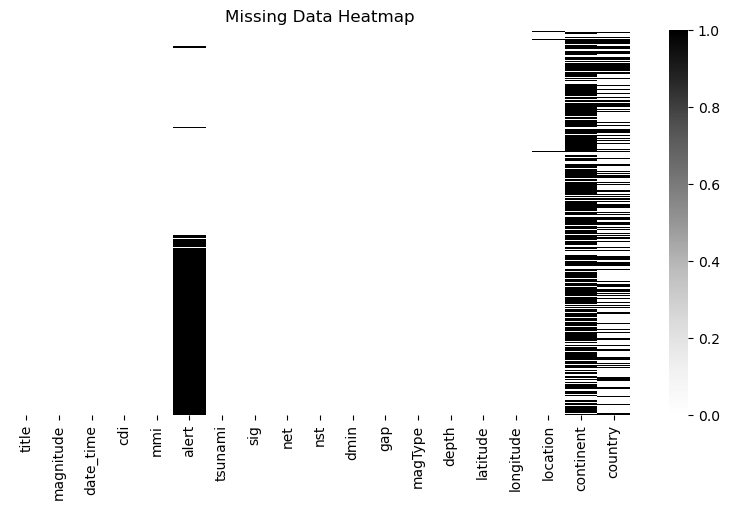

In [3]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cmap='Greys', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [5]:
df['country']= df['location'].str.split(',').str[-1].str.strip()
df.to_csv('earthquake1.csv', index=False)
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,Indonesia
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,NaN
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,Tonga
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


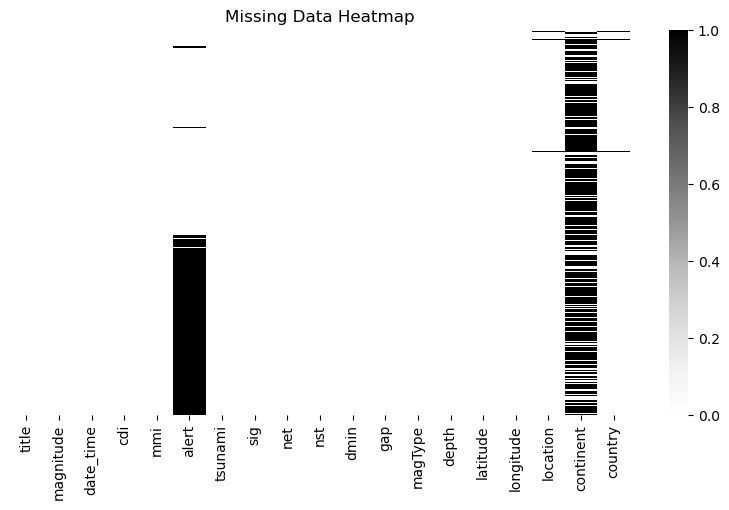

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cmap='Greys', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [10]:
print(f"the number of countries: {df['country'].nunique()} \n")

print(f"country list: {df['country'].unique()} \n")

continent_frequency=df["country"].value_counts()
print(continent_frequency)

the number of countries: 100 

country list: ['Solomon Islands' 'Indonesia' nan 'Tonga' 'the Fiji Islands' 'Panama'
 'Mexico' 'Taiwan' 'Vanuatu' 'Papua New Guinea' 'China'
 'the Kermadec Islands' 'Philippines' 'Brazil' 'Peru' 'Argentina'
 'Nicaragua' 'the Loyalty Islands' 'New Caledonia' 'Japan' 'New Zealand'
 'Kermadec Islands region' 'Alaska' 'Cyprus' 'Timor Leste' 'Flores Sea'
 'Vanuatu region' 'South Sandwich Islands region' 'Haiti'
 'Wallis and Futuna' 'Mauritius - Reunion region' 'Russia'
 'South Shetland Islands' 'Mongolia' 'Chile' 'Greece'
 'central Mid-Atlantic Ridge' 'NV Earthquake' 'Banda Sea' 'Idaho'
 'Jamaica' 'Turkey' 'Fiji' 'South Sandwich Islands' 'Australia' 'CA'
 'El Salvador' 'Ecuador' 'Prince Edward Islands region' 'Molucca Sea'
 'Svalbard and Jan Mayen' 'Canada' 'Venezuela' 'Hawaii' 'Bolivia'
 'Honduras' 'Bouvet Island region' 'Costa Rica' 'Iraq' 'Russia region'
 'New Zealand region' 'Guatemala' 'Botswana' 'California' 'Tajikistan'
 'Italy' 'Fiji region' 'Myanmar' 

update country values

In [15]:
replace_dict = {
    'Россия': 'Russia',
    "People's Republic of China": 'China',
    '日本': 'Japan',
    "New Zealand/Aotearoa": "New Zealand",
    'Ελλάς': 'Greece',
    "United Kingdom of Great Britain and Northern Ireland (the)": "United Kingdom",
    "South Georgia and the South Sandwich Islands": 'Georgia',
    'México': 'Mexico', 'the loyalty island': 'New Caledonia', 'Kermadec Islands region': 'New Zealand',
    'Alaska': 'United States', 'Flores Sea': 'Indonesia', 'NV Earthquake': 'United States',
    'Idaho': 'United States', 'Bouvet Island region': 'Norway', 'Russia region': 'Russia',
    'California': 'United States', 'Northern Mariana Islands': 'United States', 'Guam': 'United States',
    'Japan region': 'Japan', 'the Kuril Islands': 'Kuril Islands',
    '2004 Sumatra - Andaman Islands Earthquake': 'Andaman Islands', 'Washington': 'United States'
}

# Check for NaN values in 'country' column
mask_notna = df['country'].notna()

# Convert both keys and values to lowercase for case-insensitive matching
replace_dict_lower = {key.lower(): value for key, value in replace_dict.items()}
df['country'] = df['country'].apply(lambda x: replace_dict_lower.get(x.lower(), x) if pd.notna(x) else x)

df.to_csv('earthquake1.csv')


update the continent column from the gotten couuntry

In [16]:
def update_continents(df):
    for index, row in df.iterrows():
        country = row['country']
        if not pd.isnull(country):
            try:
                # Convert country to continent
                country_alpha2 = pc.country_name_to_country_alpha2(country)
                continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
                continent = pc.convert_continent_code_to_continent_name(continent_code)

                # Update the DataFrame
                df.at[index, 'continent'] = continent

                print(f"Updated continent for country '{country}'")

            except Exception as e:
                print(f"Error updating continent for country '{country}': {str(e)}")

    return df

# Example usage
input_file = 'earthquake1.csv'
output_file = 'earthquake2.csv'

df = pd.read_csv(input_file)
df_updated = update_continents(df)
df_updated.to_csv(output_file, index=False)
print(f"Saved updated DataFrame to '{output_file}'")

Updated continent for country 'Solomon Islands'
Updated continent for country 'Indonesia'
Updated continent for country 'Tonga'
Error updating continent for country 'the Fiji Islands': "Invalid Country Name: 'the Fiji Islands'"
Error updating continent for country 'the Fiji Islands': "Invalid Country Name: 'the Fiji Islands'"
Updated continent for country 'Panama'
Updated continent for country 'Mexico'
Updated continent for country 'Mexico'
Updated continent for country 'Taiwan'
Updated continent for country 'Taiwan'
Updated continent for country 'Vanuatu'
Updated continent for country 'Papua New Guinea'
Updated continent for country 'China'
Error updating continent for country 'the Kermadec Islands': "Invalid Country Name: 'the Kermadec Islands'"
Updated continent for country 'Philippines'
Updated continent for country 'Brazil'
Updated continent for country 'Peru'
Updated continent for country 'Argentina'
Updated continent for country 'Nicaragua'
Error updating continent for country '